<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas


1. . Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)


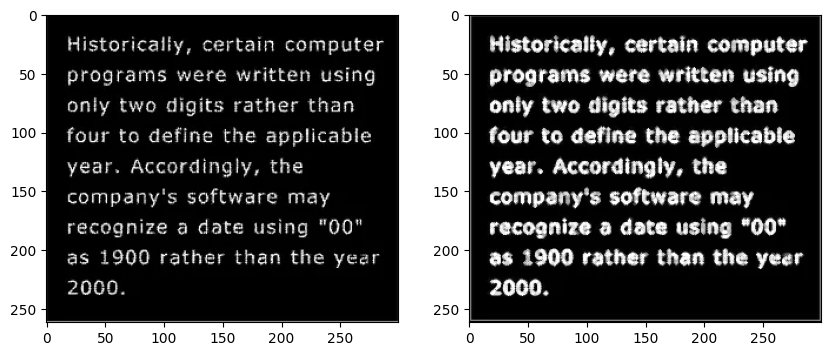

In [9]:
def dilate(image, structuring_element):
    rows, cols = image.shape
    dilated_image = np.zeros_like(image, dtype="uint8")

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]
            dilated_image[i, j] = np.max(neighborhood * structuring_element)

    return dilated_image

cross3x3 = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype="uint8")

img_ori = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

dilated_image = dilate(img_ori, cross3x3)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_ori, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

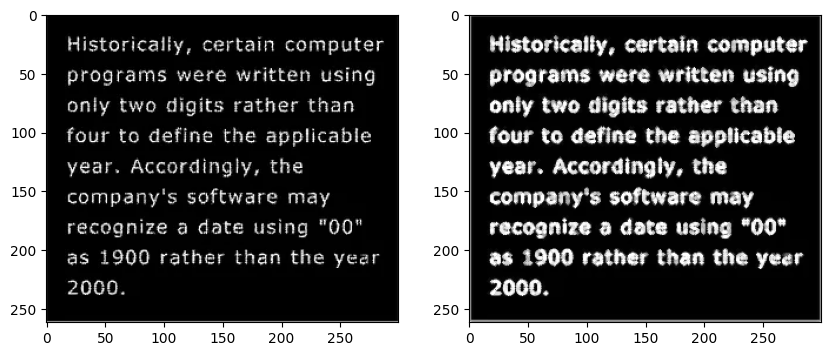

In [10]:
cross3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

dilated_image1 = cv2.dilate(img_ori, cross3x3)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_ori, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image1, cmap='gray')
plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

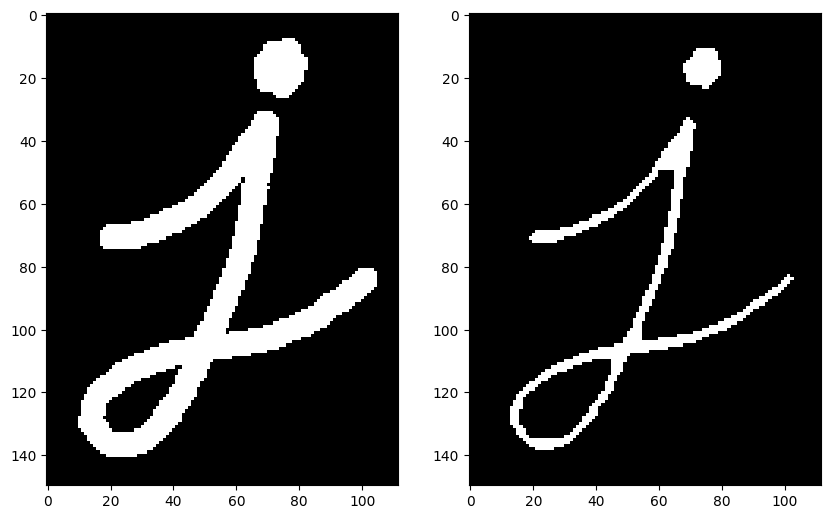

In [22]:
img_ori1 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')
img_ori1 = cv2.cvtColor(img_ori1, cv2.COLOR_BGR2GRAY)


def erode(img, kernel):
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  result = np.zeros_like(img)

  for i in range(pad_h, height - pad_h):
    for j in range(pad_w, width - pad_w):
      region = img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

      result[i, j] = np.min(region[kernel == 1])

  return result

square5x5 = np.array([[1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1]])

eroded_image = erode(img_ori1, square5x5)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_ori1, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


Structuring Element (Square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


<ipython-input-24-f168b2cdb356>:21: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


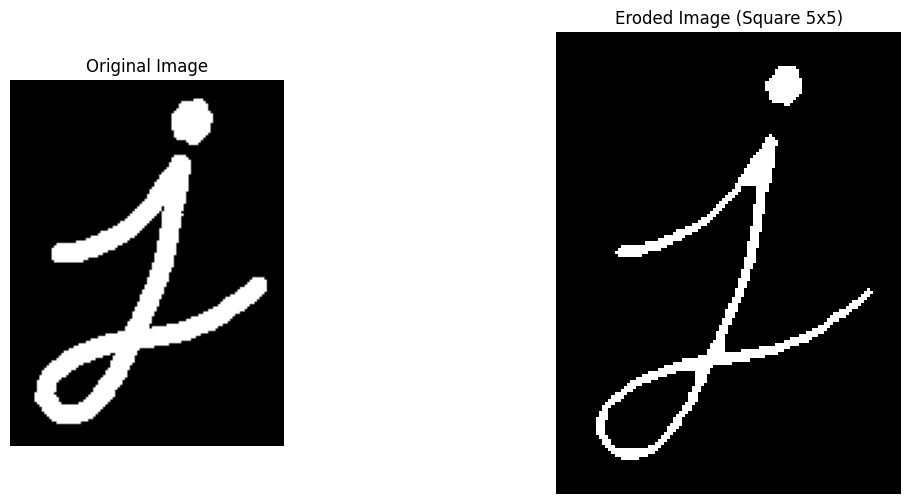

In [24]:
_, binary_img = cv2.threshold(img_ori1, 127, 255, cv2.THRESH_BINARY)

se_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

print("Structuring Element (Square 5x5):\n", se_square)

eroded_img = cv2.erode(binary_img, se_square, iterations=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image (Square 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


In [28]:
img_ori2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')
img_ori2 = cv2.cvtColor(img_ori2, cv2.COLOR_BGR2GRAY)

- Tanpa library

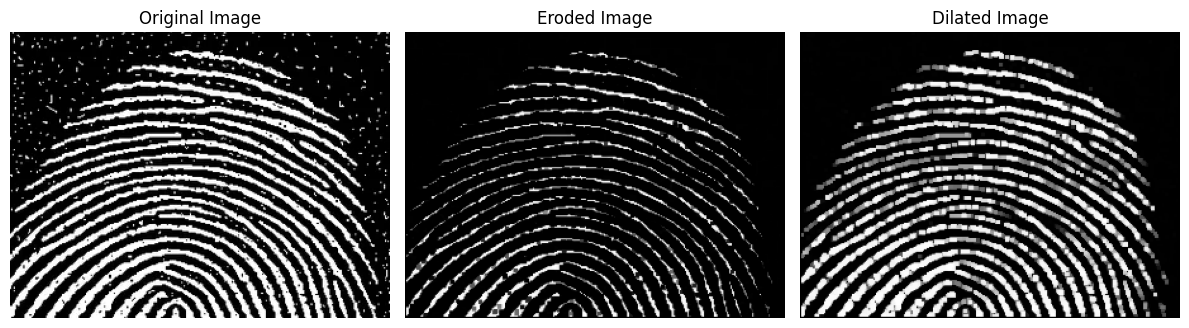

In [29]:
square3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_img_manual = erode(img_ori2, square3x3)
dilated_img_manual = dilate(eroded_img_manual, square3x3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_ori2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img_manual, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_img_manual, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()

- Dengan library


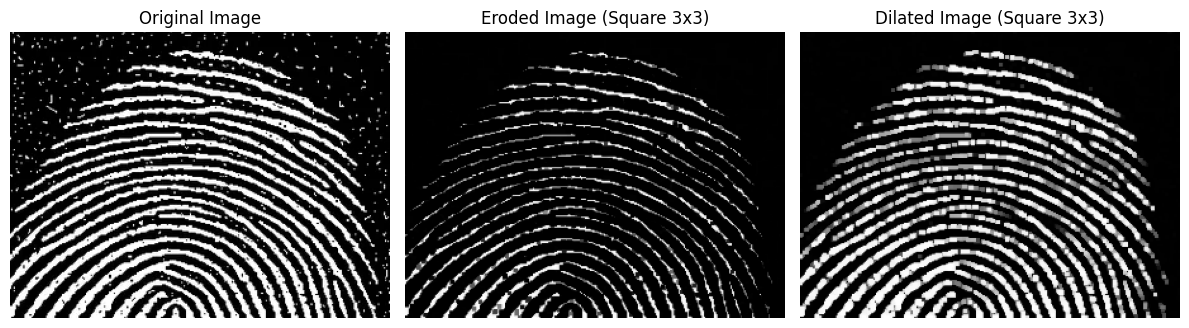

In [30]:
square3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_img = cv2.erode(img_ori2, square3x3, iterations=1)
dilated_img = cv2.dilate(eroded_img, square3x3, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_ori2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image (Square 3x3)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image (Square 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

- Tanpa library

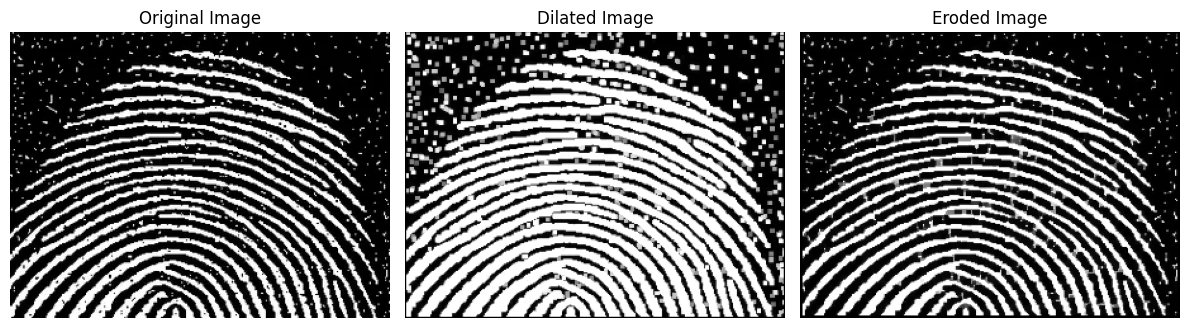

In [32]:
dilated_img_manual = dilate(img_ori2, square3x3)
eroded_img_manual = erode(dilated_img_manual, square3x3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_ori2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_img_manual, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_img_manual, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

- Dengan library

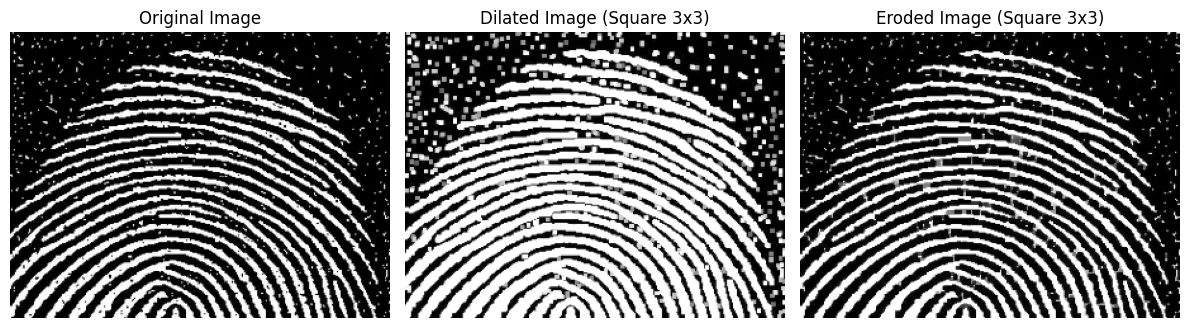

In [26]:
dilated_img = cv2.dilate(img_ori2, square3x3, iterations=1)
eroded_img = cv2.erode(dilated_img, square3x3, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_ori2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image (Square 3x3)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image (Square 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

Cross 3x3


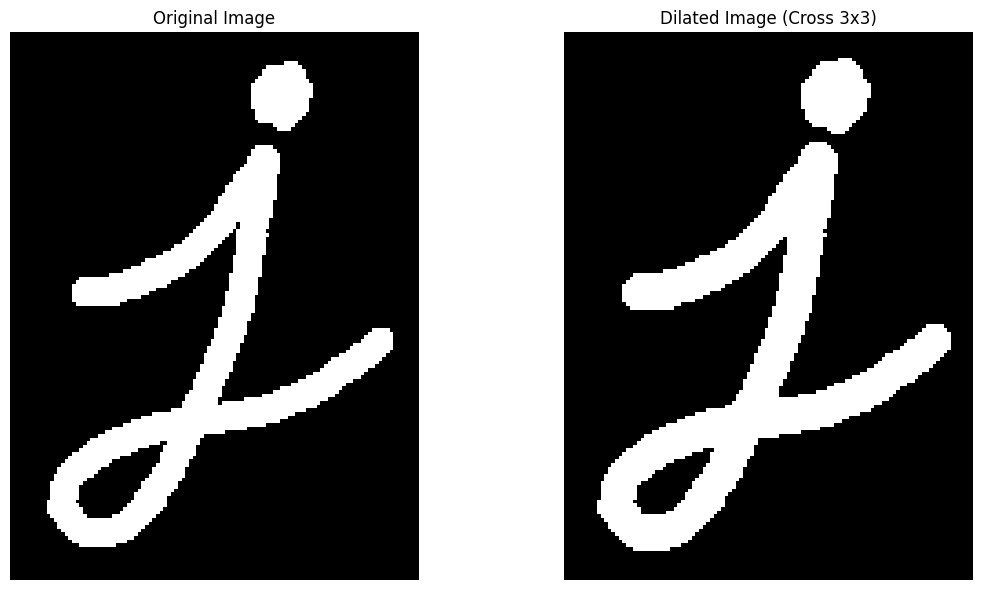

Cross 5x5


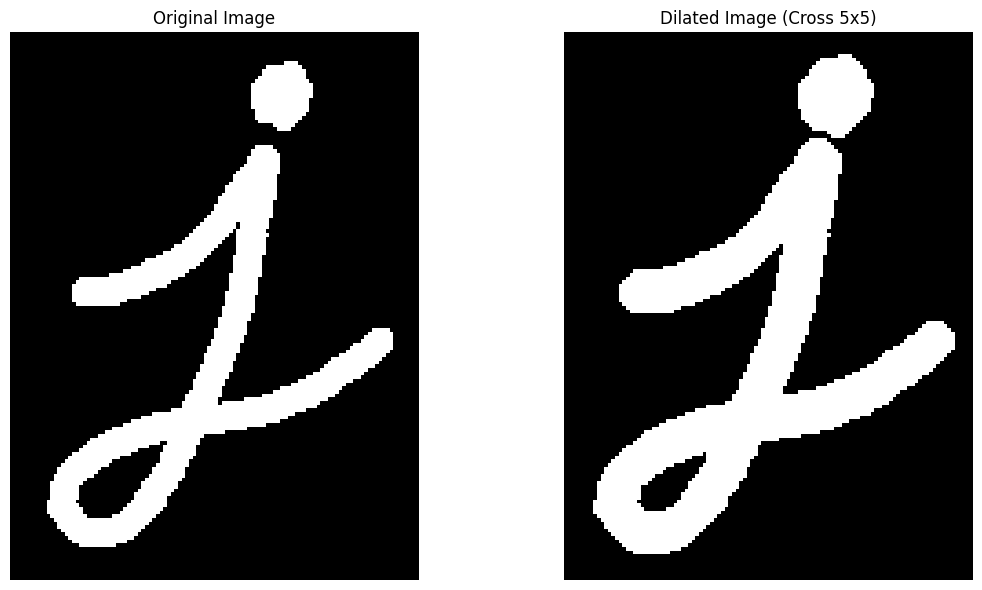

In [33]:
cross3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

dilated_img_cross3x3 = cv2.dilate(img_ori1, cross3x3, iterations=1)
dilated_img_cross5x5 = cv2.dilate(img_ori1, cross5x5, iterations=1)

print('Cross 3x3')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilated_img_cross3x3, cmap='gray')
plt.title('Dilated Image (Cross 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()

print('Cross 5x5')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilated_img_cross5x5, cmap='gray')
plt.title('Dilated Image (Cross 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

Circular 3x3


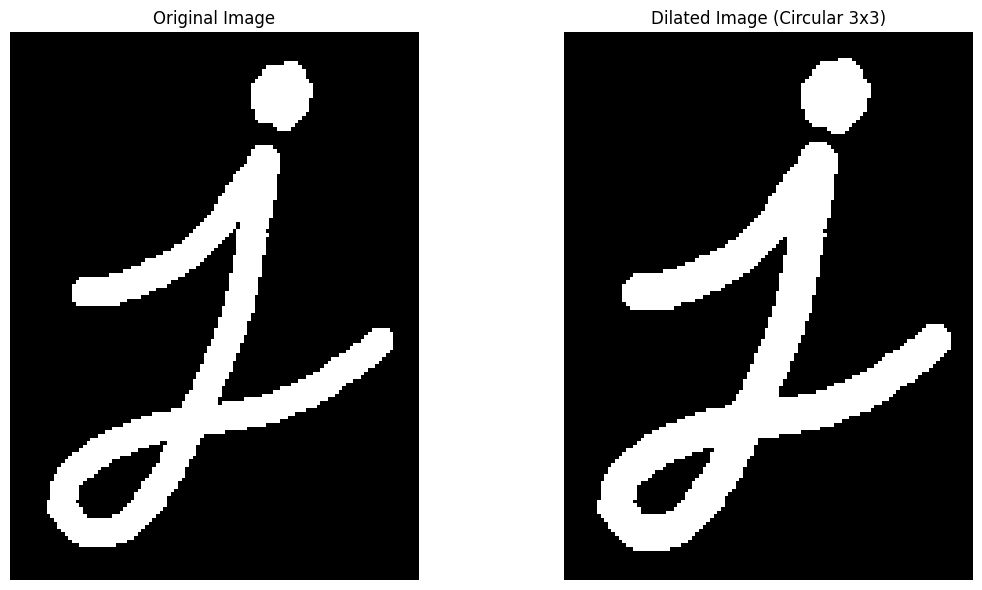

Circular 5x5


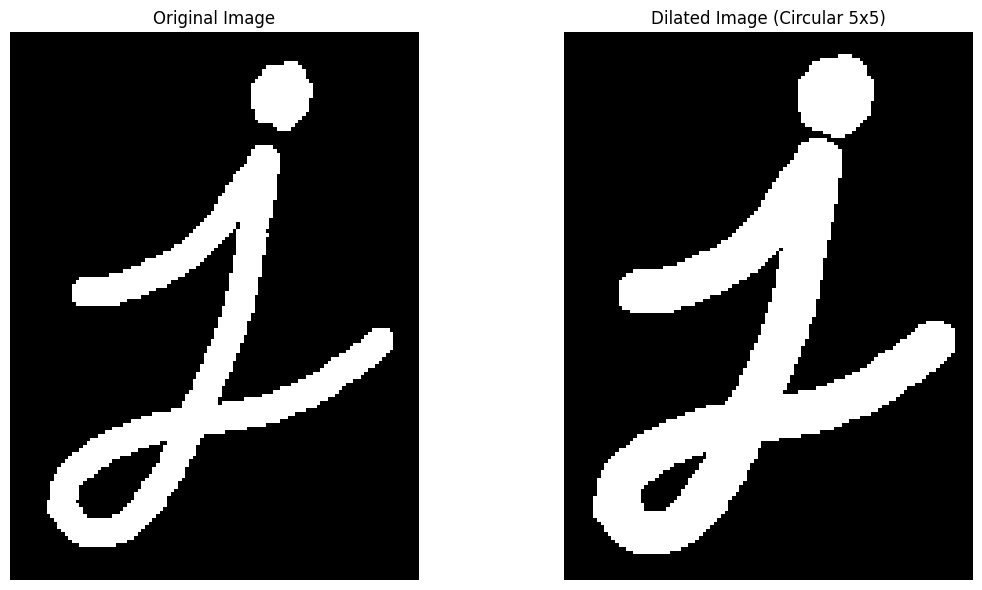

In [34]:
circular3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
circular5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

dilated_img_circular3x3 = cv2.dilate(img_ori1, circular3x3, iterations=1)
dilated_img_circular5x5 = cv2.dilate(img_ori1, circular5x5, iterations=1)

print('Circular 3x3')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilated_img_circular3x3, cmap='gray')
plt.title('Dilated Image (Circular 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()

print('Circular 5x5')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilated_img_circular5x5, cmap='gray')
plt.title('Dilated Image (Circular 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

Rectangle 3x5


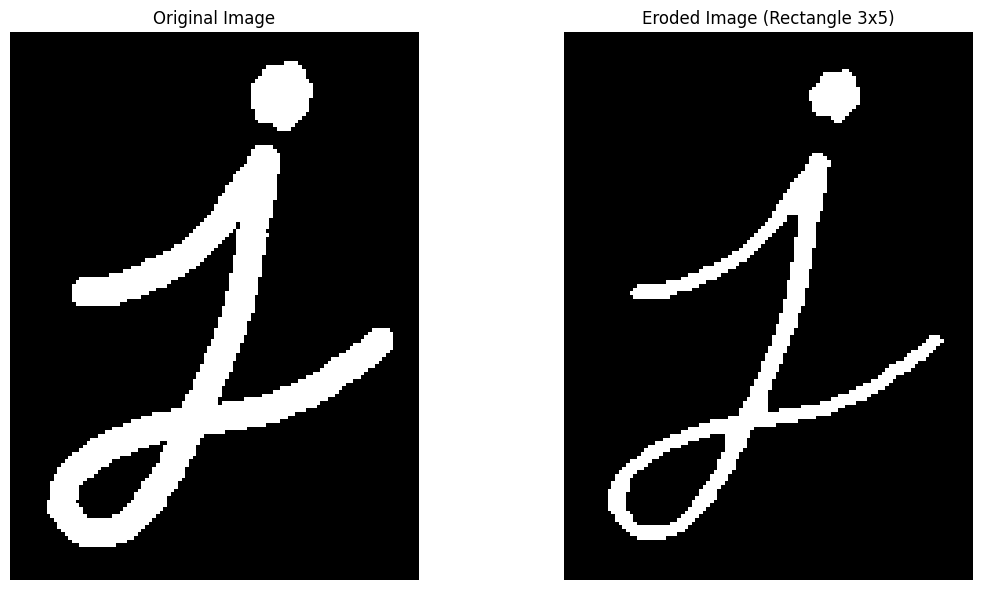

Rectangle 5x7


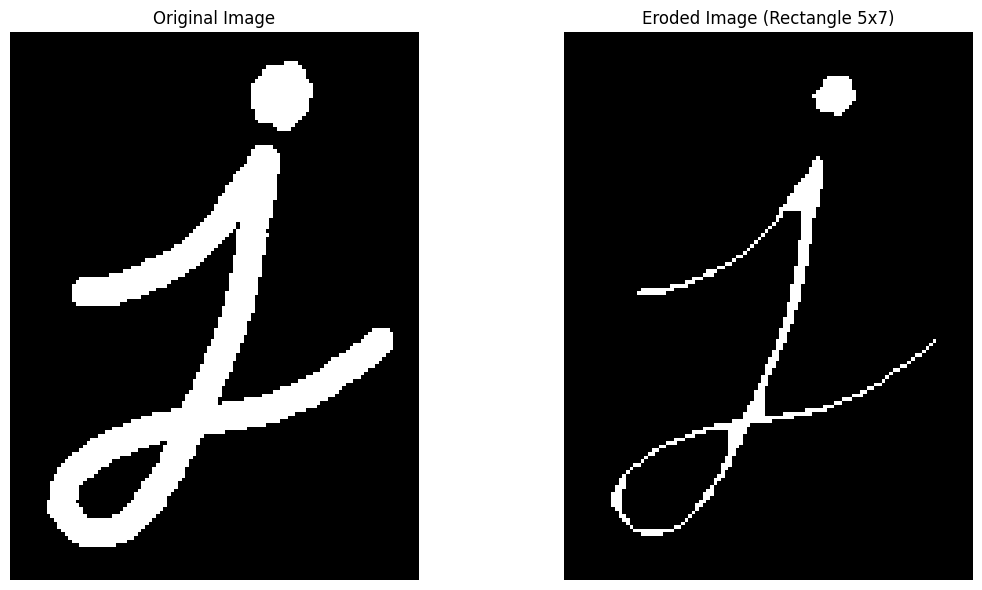

In [35]:
rectangle3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
rectangle5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

eroded_img_rectangle3x5 = cv2.erode(img_ori1, rectangle3x5, iterations=1)
eroded_img_rectangle5x7 = cv2.erode(img_ori1, rectangle5x7, iterations=1)

print('Rectangle 3x5')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eroded_img_rectangle3x5, cmap='gray')
plt.title('Eroded Image (Rectangle 3x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

print('Rectangle 5x7')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eroded_img_rectangle5x7, cmap='gray')
plt.title('Eroded Image (Rectangle 5x7)')
plt.axis('off')

plt.tight_layout()
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

Vertical 3


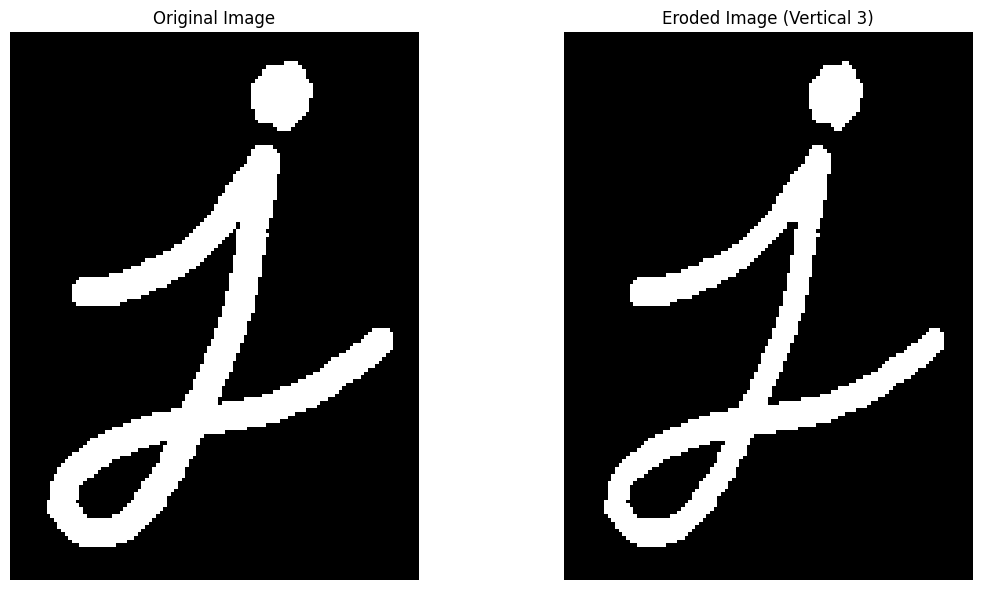

Vertical 5


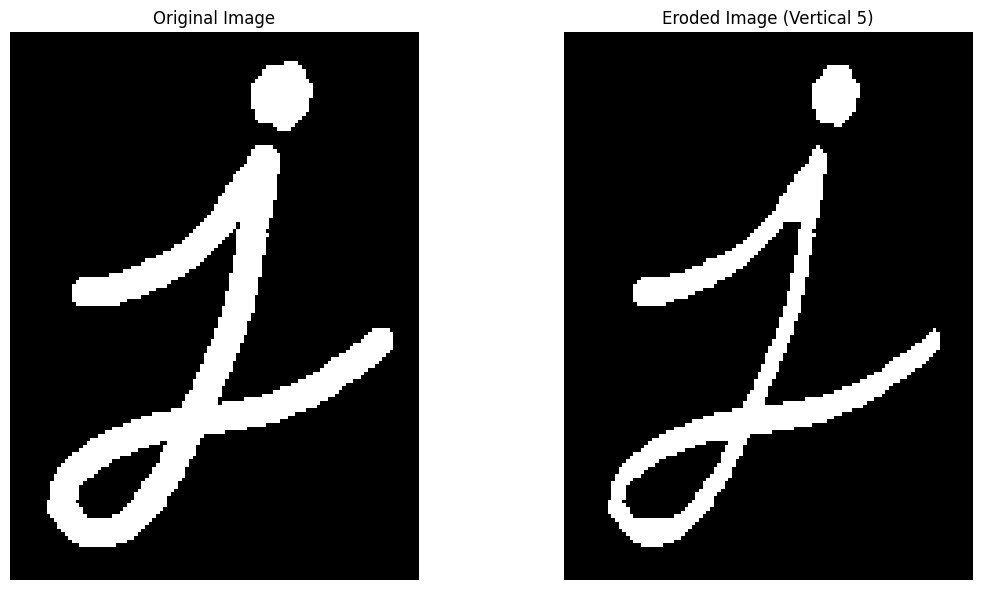

In [36]:
vertical3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))
vertical5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))

eroded_img_vertical3 = cv2.erode(img_ori1, vertical3, iterations=1)
eroded_img_vertical5 = cv2.erode(img_ori1, vertical5, iterations=1)

print('Vertical 3')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eroded_img_vertical3, cmap='gray')
plt.title('Eroded Image (Vertical 3)')
plt.axis('off')

plt.tight_layout()
plt.show()

print('Vertical 5')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_ori1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eroded_img_vertical5, cmap='gray')
plt.title('Eroded Image (Vertical 5)')
plt.axis('off')

plt.tight_layout()
plt.show()